# Setup

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display


from flask import Flask, jsonify


In [2]:
# create and save database
execfile("Setup and Organization/Database Setup.py")
# database setup
engine = create_engine("sqlite:///Resources/database.sqlite")
conn=engine.connect()


# Explore Database

In [3]:
# explore database
inspector = inspect(engine)
inspector.get_table_names()

['activity',
 'bmi',
 'gender',
 'health',
 'occupation',
 'person',
 'sleep',
 'sleep_disorder']

# Columns

In [4]:
# Get a list of column names and types
columns = inspector.get_columns('person')
for c in columns:
    print(c['name'], c["type"])
columns

index BIGINT
id BIGINT
gender_id BIGINT
age BIGINT
occupation_id BIGINT


[{'name': 'index',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'gender_id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'age',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'occupation_id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

In [5]:
# Get a list of column names and types
columns = inspector.get_columns('sleep')
for c in columns:
    print(c['name'], c["type"])
columns

index BIGINT
id BIGINT
person_id BIGINT
sleep_duration FLOAT
sleep_quality BIGINT
sleep_disorder_id BIGINT


[{'name': 'index',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'person_id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'sleep_duration',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'sleep_quality',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'sleep_disorder_id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

In [6]:
# Get a list of column names and types
columns = inspector.get_columns('health')
for c in columns:
    print(c['name'], c["type"])
columns

index BIGINT
id BIGINT
person_id BIGINT
blood_pressure TEXT
stress_level BIGINT
heart_rate BIGINT
systolic BIGINT
diastolic BIGINT
bmi_id BIGINT


[{'name': 'index',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'person_id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'blood_pressure',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'stress_level',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'heart_rate',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'systolic',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'diastolic',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'bmi_id',
  'type': BIGINT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

# Reflect and query data

In [7]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [8]:
# get age from person.csv    X
# get age, occupation and id from person.csv     text value
# toggle between gender
age= Person.age
occupation= Person.occupation_id
gender= Person.gender_id

# get sleep duration from sleep.csv    Y
# get quality of sleep from sleep.csv    marker size
durration = Sleep.sleep_duration
quality = Sleep.sleep_quality

# get stress_level from health.csv    marker color
stress = Health.stress_level

In [9]:
# session= Session(engine)
Person= pd.read_sql("SELECT * FROM person", conn)
Sleep= pd.read_sql("SELECT * FROM sleep", conn)
Health= pd.read_sql("SELECT * FROM health", conn)
merged_data = pd.merge(Person, Sleep, on='id')
merged_data = pd.merge(merged_data, Health, on='id')
merged_data


,index_x,id,gender_id,age,occupation_id,index_y,person_id_x,sleep_duration,sleep_quality,sleep_disorder_id,index,person_id_y,blood_pressure,stress_level,heart_rate,systolic,diastolic,bmi_id
0,0,1,0,27,0,1,2,6.2,6,0,1,69,128/85,6,76,128,85,0
1,1,6,0,28,0,6,11,6.1,6,0,6,84,128/84,5,70,128,84,0
2,2,85,0,35,0,85,101,7.2,8,0,85,275,140/95,8,75,140,95,0
3,3,93,0,35,0,93,112,7.4,8,0,93,286,140/95,8,75,140,95,0
4,4,2,0,28,1,2,3,6.2,6,0,2,70,128/85,6,76,128,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,69,1,33,7,69,83,6.7,7,0,69,257,135/90,4,65,135,90,0
369,370,70,1,33,7,70,84,6.7,7,0,70,258,135/90,4,65,135,90,0
370,371,81,1,34,7,81,97,7.2,8,0,81,271,140/95,8,75,140,95,0
371,372,82,1,34,7,82,98,7.1,8,0,82,272,140/95,8,75,140,95,0


In [10]:
# remove columns not in use
desired_columns = ['gender_id', 'age', 'occupation_id', 'sleep_duration', 'sleep_quality', 'stress_level']
merged_data = merged_data[desired_columns]
print(merged_data)

     gender_id  age  occupation_id  sleep_duration  sleep_quality  \
0            0   27              0             6.2              6   
1            0   28              0             6.1              6   
2            0   35              0             7.2              8   
3            0   35              0             7.4              8   
4            0   28              1             6.2              6   
..         ...  ...            ...             ...            ...   
368          1   33              7             6.7              7   
369          1   33              7             6.7              7   
370          1   34              7             7.2              8   
371          1   34              7             7.1              8   
372          1   45             10             6.0              6   

     stress_level  
0               6  
1               5  
2               8  
3               8  
4               6  
..            ...  
368             4  
369        

In [11]:
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

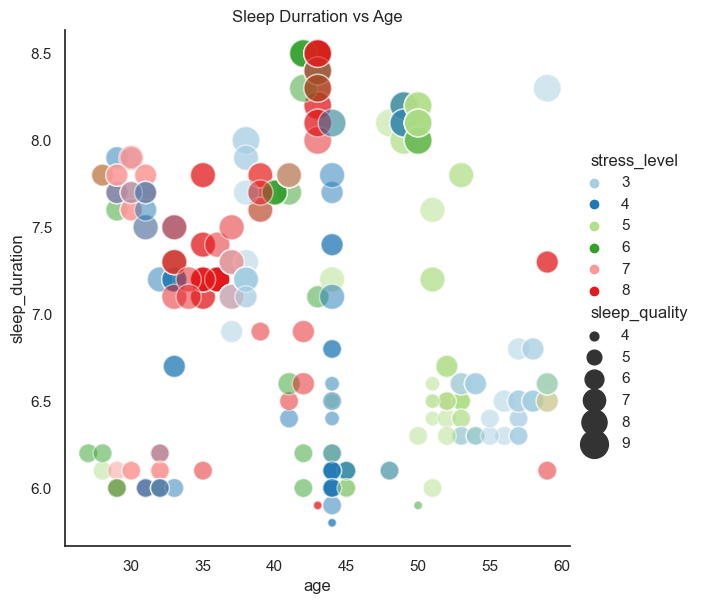

In [19]:
#seaborn scatterplot
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="age", y="sleep_duration", hue="stress_level", size="sleep_quality",
            sizes=(40, 400), alpha=.5, palette="Paired",
            height=6, data=merged_data).set(title= "Sleep Durration vs Age")


# First attempt


In [13]:
female_data = merged_data[(merged_data['gender_id'] == 1)]
male_data = merged_data[(merged_data['gender_id'] == 0)]


In [14]:
# Filter data based on the selected gender
filtered_data = merged_data[merged_data['gender_id'] == gender_id]

    # Plot
sns.relplot(x="age", y="sleep_duration", hue="stress_level", size="sleep_quality",
                sizes=(40, 400), alpha=.5, palette="Paired",
                height=6, data=filtered_data).set(title= "Sleep Duration vs Age",)



NameError: name 'gender_id' is not defined

In [18]:
# Create a dropdown widget to select gender
gender_dropdown = widgets.Dropdown(
    options={'Male': 0, 'Female': 2},
    description='Gender:'
)

Create an interaction with the dropdown widget
# interact(plot_sleep_data, gender_id=gender_dropdown);

SyntaxError: invalid syntax (843618559.py, line 7)

genders=filtered_data["gender_name"].unique().tolist()



In [17]:
# Set the seaborn theme
sns.set_theme(style="white")

# Define a function to plot the data based on the selected gender
def plot_sleep_data(gender):
    if gender == 'Male':
        data = male_data
    elif gender == 'Female':
        data = female_data
    else:
        return
    
    # Plot the data
    sns.relplot(x="age", y="sleep_duration", hue="stress_level", size="sleep_quality",
                sizes=(40, 400), alpha=.5, palette="Paired",
                height=6, data=data).set(title="Sleep Duration vs Age")
    plt.show()

# Create a dropdown widget to select gender
gender_dropdown = widgets.Dropdown(
    options=['Male', 'Female'],
    description='Gender:'
)

# Create an interaction with the dropdown widget
interact(plot_sleep_data, gender=gender_dropdown);

interactive(children=(Dropdown(description='Gender:', options=('Male', 'Female'), value='Male'), Output()), _d…

# Second Attempt

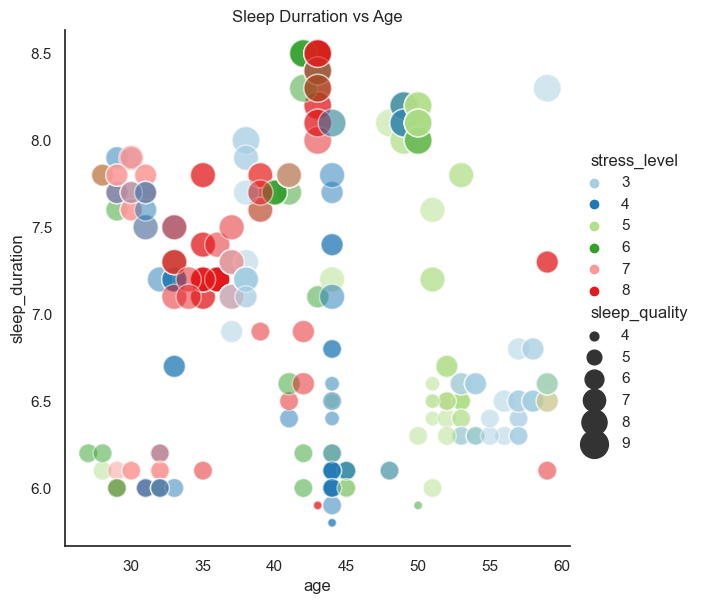

In [20]:
#seaborn scatterplot
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="age", y="sleep_duration", hue="stress_level", size="sleep_quality",
            sizes=(40, 400), alpha=.5, palette="Paired",
            height=6, data=merged_data).set(title= "Sleep Durration vs Age")


In [29]:
data= merged_data

# Create a dropdown widget to select gender
gender_dropdown = widgets.Dropdown(
    options={'Male': 0, 'Female': 1},
    description='Gender:'
)

def draw_plot(item1):
    sns.set_theme(style="white")
    sns.relplot(x=data.loc[(data["gender_id"]== item1),"age"],
                y=data.loc[(data["gender_id"]== item1),"sleep_duration"], 
                hue=data.loc[(data["gender_id"]== item1),"stress_level"],
                size=data.loc[(data["gender_id"]== item1),"sleep_quality"],
            sizes=(40, 400), alpha=.5, palette="Paired").set(title= "Sleep Durration vs Age")

out1= widgets.interactive_output(draw_plot,{"item1":gender_dropdown})
display(gender_dropdown,out1)

Dropdown(description='Gender:', options={'Male': 0, 'Female': 1}, value=0)

Output()